# Problem Statement: - 

A plastics manufacturing plant has recorded their monthly sales data from 1949 to 1953. Perform forecasting on the data and bring out insights from it and forecast the sale for the next year. 


# 1.1. What is the business objective?
The primary business objective is to forecast future monthly sales of a plastics manufacturing plant using historical data from January 1949 to December 1953. By identifying trends, seasonality, and patterns in the sales data, the company aims to:

Optimize production planning: Avoid overproduction or underproduction.

Manage inventory levels: Ensure raw materials and finished goods are stocked appropriately.

Improve budgeting and financial planning.

Enhance strategic decision-making by anticipating demand for the upcoming year (1954).

# 1.2. Are there any constraints?

Limited historical data: Only 5 years (60 months) of data are available.

Seasonal variations: Sales may be influenced by seasonal or cyclical patterns.

No external variables: The dataset contains only sales values—no marketing, economic, or competitor data are provided to explain variances.

Accuracy of forecasting: Long-term predictions can be less accurate, especially with limited data and potential market changes.

Tooling and methods: Forecasting accuracy can depend on the choice of model (e.g., ARIMA, Holt-Winters, etc.), which must handle seasonality well.

# 2. Data Pre-processing

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

In [27]:
#Load the dataset
df=pd.read_csv("PlasticSales.csv")

# Data Exploration

In [40]:
df.head()

,Month,Sales
0,Jan-49,742
1,Feb-49,697
2,Mar-49,776
3,Apr-49,898
4,May-49,1030


In [42]:
df.tail()

,Month,Sales
55,Aug-53,1608
56,Sep-53,1528
57,Oct-53,1420
58,Nov-53,1119
59,Dec-53,1013


In [44]:
df.shape

(60, 2)

In [46]:
df.describe()

,Sales
count,60.000000
mean,1162.366667
std,266.431469
min,697.000000
25%,947.750000
50%,1148.000000
75%,1362.500000
max,1637.000000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   60 non-null     object
 1   Sales   60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [50]:
df.columns

Index(['Month', 'Sales'], dtype='object')

In [52]:
df.isnull().sum()

Month    0
Sales    0
dtype: int64

# 2.1 Data Cleaning & Feature Engineering

In [59]:
# Convert Month to datetime and set as index
df['Month'] = pd.to_datetime(df['Month'], format='%b-%y')
df.set_index('Month', inplace=True)

In [61]:
# Feature Engineering: Extract Year and Month Name
df['Year'] = df.index.year
df['MonthName'] = df.index.month_name()

In [63]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 Sales        0
Year         0
MonthName    0
dtype: int64


In [65]:

# Summary statistics
print("\nSummary Statistics:\n", df['Sales'].describe())


Summary Statistics:
 count      60.000000
mean     1162.366667
std       266.431469
min       697.000000
25%       947.750000
50%      1148.000000
75%      1362.500000
max      1637.000000
Name: Sales, dtype: float64


#  2.2 Outlier Treatment

In [75]:
# Outlier detection using IQR method
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

In [77]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [79]:
# Identify outliers
outliers = df[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]
print("\nOutliers detected:\n", outliers)


Outliers detected:
 Empty DataFrame
Columns: [Sales, Year, MonthName]
Index: []


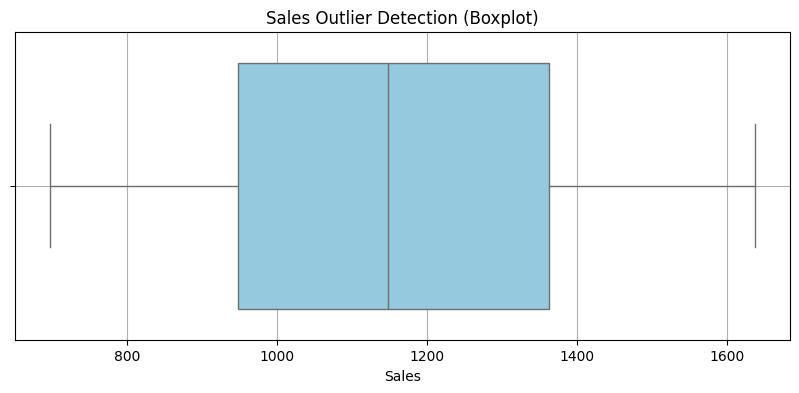

In [81]:
# Visualize with a boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Sales'], color='skyblue')
plt.title('Sales Outlier Detection (Boxplot)')
plt.xlabel('Sales')
plt.grid(True)
plt.show()

# 3. Exploratory Data Analysis (EDA)

## 3.1 Summary

In [85]:
summary_stats = df['Sales'].describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
 count      60.000000
mean     1162.366667
std       266.431469
min       697.000000
25%       947.750000
50%      1148.000000
75%      1362.500000
max      1637.000000
Name: Sales, dtype: float64


##  3.2 Identify Trend

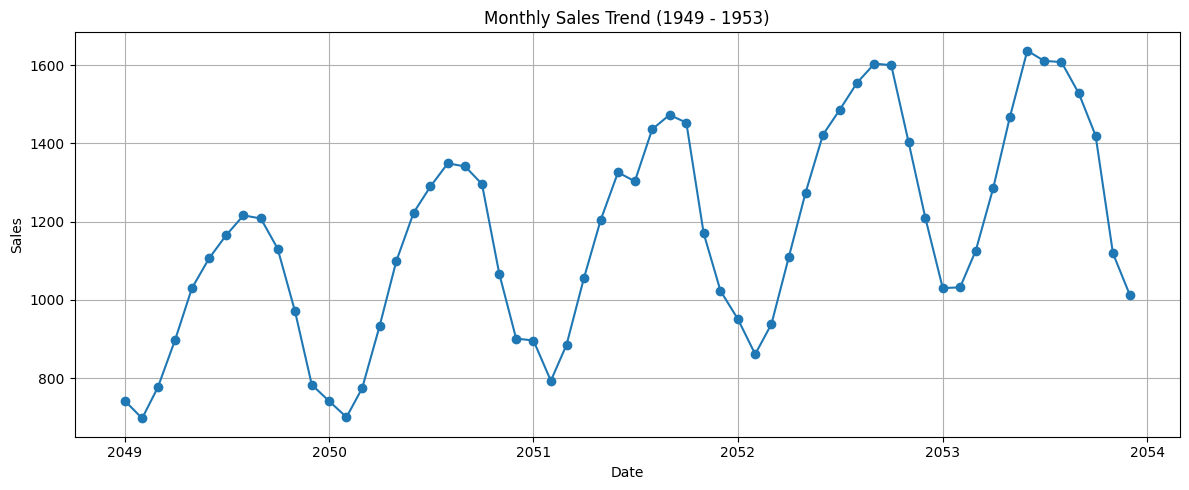

In [88]:
plt.figure(figsize=(12, 5))
plt.plot(df['Sales'], marker='o', linestyle='-')
plt.title('Monthly Sales Trend (1949 - 1953)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

## 3.3 Identify Seasonality

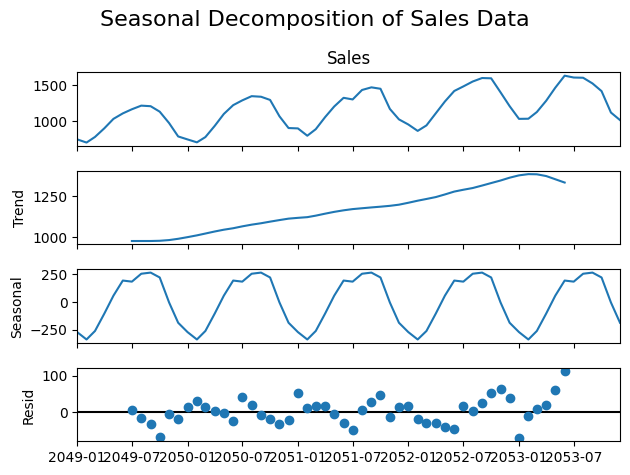

In [102]:
#Seasonal Decomposition
decomposition = seasonal_decompose(df['Sales'], model='additive', period=12)
decomposition.plot()
plt.suptitle("Seasonal Decomposition of Sales Data", fontsize=16)
plt.tight_layout()
plt.show()

# 4. Model Building & Forecasting

## 4.1 – Forecasting using Moving Averages

In [106]:
#Calculate 3-month and 12-month Moving Averages
df['MA_3'] = df['Sales'].rolling(window=3).mean()
df['MA_12'] = df['Sales'].rolling(window=12).mean()

In [110]:
#Forecast for Next 12 Months (1954)
# We'll take the last 12 months and use their average as a naive forecast
forecast_values = [df['Sales'][-12:].mean()] * 12
future_months = pd.date_range(start='1954-01-01', periods=12, freq='MS')
forecast_df = pd.DataFrame({'Sales_Forecast': forecast_values}, index=future_months)


In [112]:
forecast_df

,Sales_Forecast
1954-01-01,1323.083333
1954-02-01,1323.083333
1954-03-01,1323.083333
1954-04-01,1323.083333
1954-05-01,1323.083333
1954-06-01,1323.083333
1954-07-01,1323.083333
1954-08-01,1323.083333
1954-09-01,1323.083333
1954-10-01,1323.083333


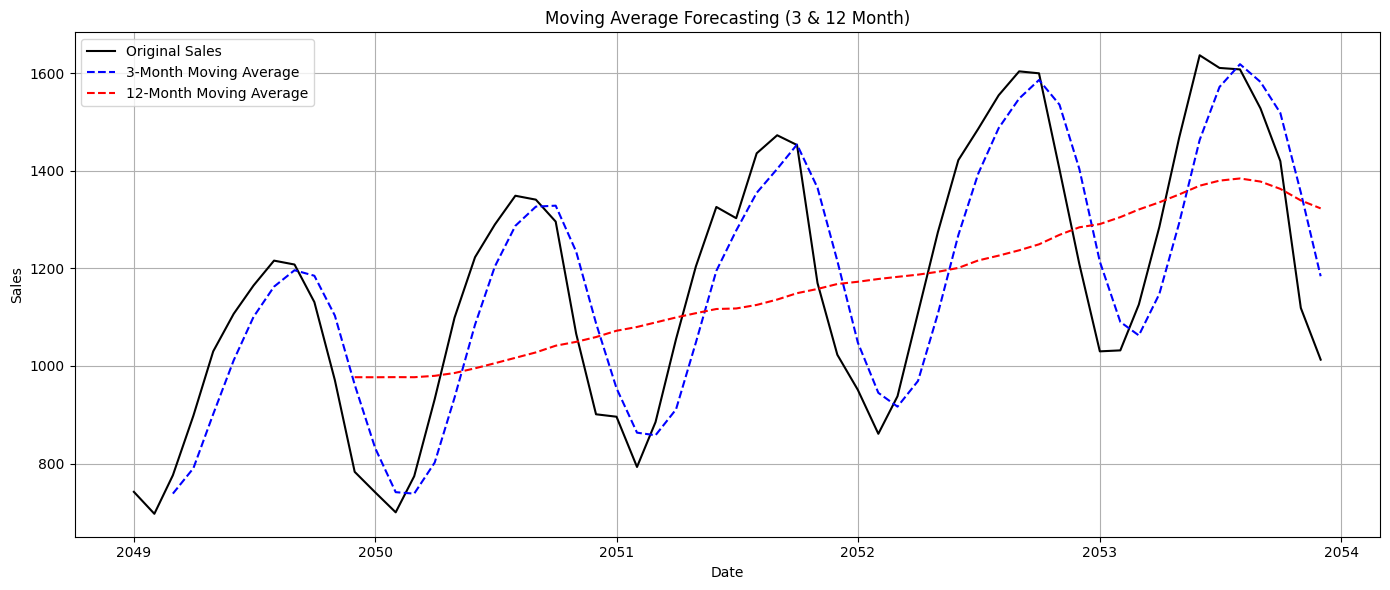

In [116]:
 #Plot the Original Data with Moving Averages
plt.figure(figsize=(14, 6))
plt.plot(df['Sales'], label='Original Sales', color='black')
plt.plot(df['MA_3'], label='3-Month Moving Average', color='blue', linestyle='--')
plt.plot(df['MA_12'], label='12-Month Moving Average', color='red', linestyle='--')
plt.title("Moving Average Forecasting (3 & 12 Month)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 4.2 – Exponential Smoothing, Holt-Winters, and ARIMA

In [153]:
# Forecasting horizon
forecast_period = 12
future_months = pd.date_range(start='1954-01-01', periods=forecast_period, freq='MS')

In [155]:
# 1. Simple Exponential Smoothing (SES)
# ========================
ses_model = SimpleExpSmoothing(df['Sales']).fit()
ses_forecast = ses_model.forecast(forecast_period)

C:\Users\Hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [133]:
# 2. Holt’s Linear Trend Method
# ========================
holt_model = ExponentialSmoothing(df['Sales'], trend='add', seasonal=None).fit()
holt_forecast = holt_model.forecast(forecast_period)

C:\Users\Hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [135]:
# 3. Holt-Winters (Additive)
# ========================
hw_model = ExponentialSmoothing(df['Sales'], trend='add', seasonal='add', seasonal_periods=12).fit()
hw_forecast = hw_model.forecast(forecast_period)

C:\Users\Hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [137]:
# 4. ARIMA (p=1, d=1, q=1)
# ========================
arima_model = ARIMA(df['Sales'], order=(1, 1, 1)).fit()
arima_forecast = arima_model.forecast(steps=forecast_period)

C:\Users\Hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [148]:
arima_forecast

2054-01-01    968.910923
2054-02-01    943.536063
2054-03-01    928.931912
2054-04-01    920.526694
2054-05-01    915.689187
2054-06-01    912.905027
2054-07-01    911.302641
2054-08-01    910.380411
2054-09-01    909.849633
2054-10-01    909.544152
2054-11-01    909.368336
2054-12-01    909.267148
Freq: MS, Name: predicted_mean, dtype: float64

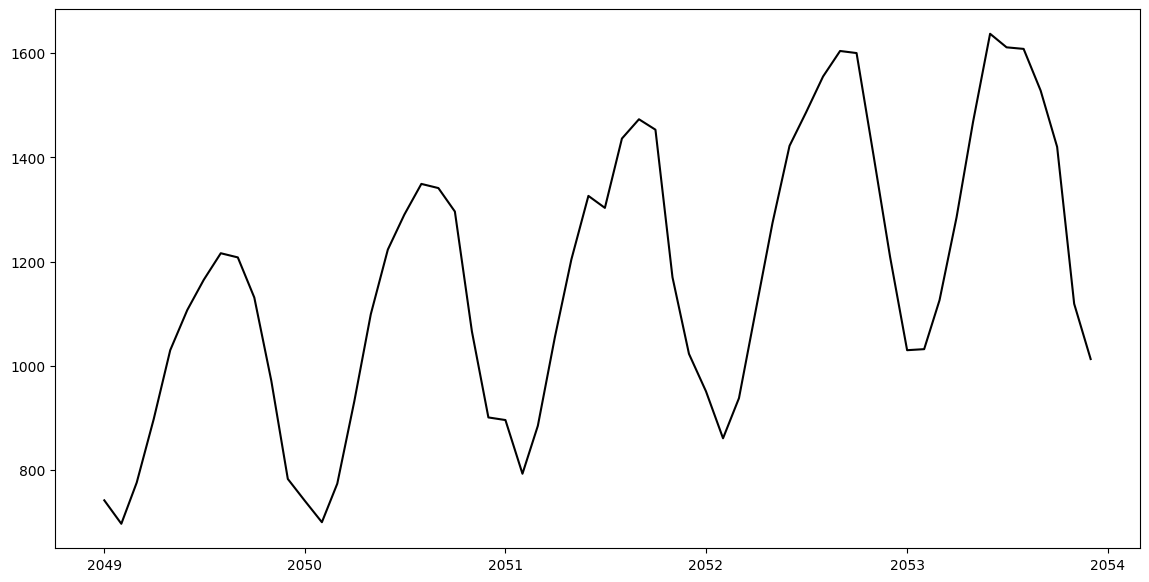

In [139]:
# Plotting All Forecasts
# ========================
plt.figure(figsize=(14, 7))
plt.plot(df['Sales'], label='Original Sales', color='black')

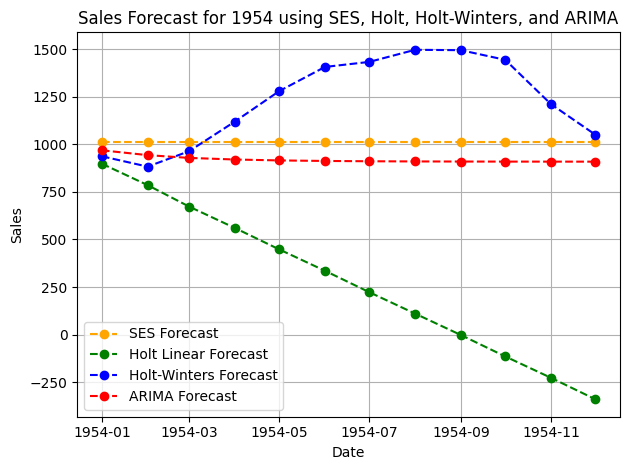

In [145]:
plt.plot(future_months, ses_forecast, label='SES Forecast', linestyle='--', color='orange', marker='o')
plt.plot(future_months, holt_forecast, label='Holt Linear Forecast', linestyle='--', color='green', marker='o')
plt.plot(future_months, hw_forecast, label='Holt-Winters Forecast', linestyle='--', color='blue', marker='o')
plt.plot(future_months, arima_forecast, label='ARIMA Forecast', linestyle='--', color='red', marker='o')

plt.title("Sales Forecast for 1954 using SES, Holt, Holt-Winters, and ARIMA")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()